# Naïve Bayes Classifier


**참고**
https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98-Naive-Bayes-Classification


### Definition

- Statistical method for classification
- Supervised learning method
- Assumes an underlying probabilistic model, the Bayes theorem
- Can solve problems involving both categorical and continuous valued attributes
- Named after Thomas Bayes, who proposed the Bayes theorem

### Characteristics

- Data-driven, not model-driven

### Usage

- Requires categorical variables
- Numerical variable must be binned and converted to categorical
- Can be used with very large data sets
- Example: Spell check programs assign your misspelled word to an established “class” (i.e., correctly spelled word)


### Exact Bayes Classifier
- Relies on finding other records that share same predictor values as record-to-be-classified 
- Want to find “probability of belonging to class C, given specified values of predictors”
- Even with large data sets, may be *hard* to find other records that exactly match your record, in terms of predictor values

- Solution – Naïve Bayes
    - Assume independence of predictor variables (within each class)
    - Use multiplication rule
    - Find same probability that record belongs to class C, given predictor values, **without** limiting calculation to records that share all those same values
    
    
### Pros & Cons
- Advantages 
    - Handles purely categorical data well
    - Works well with very large data sets
    - Simple & computationally efficient

- Shortcomings
    - Requires large number of records
    - Problematic when a predictor category is not present in training data 
    - Assigns 0 probability of response, ignoring information in other variables

## Example: 

In [6]:
#Install Data Mining for Business Analytics (dmba)
!conda config --add channels conda-forge
!conda config --set channel_priority strict
#!conda install dmba

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart

no display found. Using non-interactive Agg backend


In [2]:
delays_df = pd.read_csv('FlightDelays.csv')

### Preprocessing

In [3]:
delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


In [4]:
delays_df

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


In [5]:
# convert to categorical (convert datatype from string to ‘category’)
delays_df.DAY_WEEK = delays_df.DAY_WEEK.astype('category')
delays_df['Flight Status'] = delays_df['Flight Status'].astype('category')
# create hourly bins departure time
delays_df.CRS_DEP_TIME = [round(t / 100) for t in delays_df.CRS_DEP_TIME]
delays_df.CRS_DEP_TIME = delays_df.CRS_DEP_TIME.astype('category')

In [7]:
delays_df

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,15,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,16,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,12,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,17,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,10,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,6,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,17,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,16,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,14,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


In [8]:
# convert categorical variables into dummy/indicator variables
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER']
outcome = 'Flight Status'
X = pd.get_dummies(delays_df[predictors])
y = delays_df['Flight Status'].astype('category')
classes = list(y.cat.categories)


### Train Naïve Bayes

In [9]:
# Split data set (60%: training set, 40%: validation set)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40,random_state=1)

#Make and train naïve Bayes model
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)
predProb_train = delays_nb.predict_proba(X_train)
predProb_valid = delays_nb.predict_proba(X_valid)
y_train_pred = delays_nb.predict(X_train)
y_valid_pred = delays_nb.predict(X_valid)

### Pivot Table
Check how the algorithm works

In [6]:
# split the original data frame into a train and test using the same random_state
train_df, valid_df = train_test_split(delays_df, test_size=0.4, random_state=1)
pd.set_option('precision', 4)

# probability of flight status
print(train_df['Flight Status'].value_counts() / len(train_df))
print()
for predictor in predictors:
    # construct the frequency table
    df = train_df[['Flight Status', predictor]]
    freqTable = df.pivot_table(index='Flight Status', columns=predictor, aggfunc=len)
    # divide each value by the sum of the row to get conditional probabilities
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    print(propTable)
print()
pd.reset_option('precision')

ontime     0.8023
delayed    0.1977
Name: Flight Status, dtype: float64

DAY_WEEK            1       2       3       4       5      6       7
Flight Status                                                       
delayed        0.1916  0.1494  0.1149  0.1264  0.1877  0.069  0.1609
ontime         0.1246  0.1416  0.1445  0.1794  0.1690  0.136  0.1048
CRS_DEP_TIME        6       7       8       9      10      11      12      13  \
Flight Status                                                                   
delayed        0.0345  0.0536  0.0651  0.0192  0.0307  0.0115  0.0498  0.0460   
ontime         0.0623  0.0633  0.0850  0.0567  0.0519  0.0340  0.0661  0.0746   

CRS_DEP_TIME       14      15      16      17      18      19      20      21  
Flight Status                                                                  
delayed        0.0383  0.2031  0.0728  0.1533  0.0192  0.0996  0.0153  0.0881  
ontime         0.0576  0.1171  0.0774  0.1001  0.0349  0.0397  0.0264  0.0529  
ORIGIN

### Score Predictions
Print predictions for a specific flight

In [7]:
# classify a specific flight by searching in the dataset
# for a flight with the same predictor values
df = pd.concat([
    pd.DataFrame({'actual': y_valid, 'predicted': y_valid_pred}),
    pd.DataFrame(predProb_valid, index=y_valid.index)
    ], axis=1)
mask = ((X_valid.CARRIER_DL == 1) & (X_valid.DAY_WEEK_7 == 1) & (X_valid.CRS_DEP_TIME_10 == 1) & (X_valid.DEST_LGA == 1) &
(X_valid.ORIGIN_DCA == 1))
df[mask]

,actual,predicted,0,1
1225,ontime,ontime,0.057989,0.942011


### Confusion Matrix

In [8]:
# Confusion matrix of training data set 
classificationSummary(y_train, y_train_pred, class_names=classes)

Confusion Matrix (Accuracy 0.7955)

        Prediction
 Actual delayed  ontime
delayed      52     209
 ontime      61     998


In [9]:
# Confusion matrix of validation data set
classificationSummary(y_valid, y_valid_pred, class_names=classes)

Confusion Matrix (Accuracy 0.7821)

        Prediction
 Actual delayed  ontime
delayed      26     141
 ontime      51     663


### Cumulative Lift (Gain) Chart
Use `gainsChart` to plot gain chart

In [26]:
df = pd.DataFrame(
    {'actual': 1 - y_valid.cat.codes, 'prob': predProb_valid[:, 0]}
    )
df = df.sort_values(by=['prob'], ascending=False).reset_index(drop=True)

In [27]:
df

,actual,prob
0,1,0.705009
1,1,0.641926
2,0,0.641926
3,0,0.641926
4,1,0.641683
...,...,...
876,0,0.012182
877,0,0.012167
878,1,0.010793
879,0,0.007802


<AxesSubplot:xlabel='# records', ylabel='# cumulative gains'>

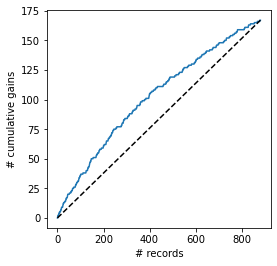

In [29]:
%matplotlib inline
fig,ax = plt.subplots()
fig.set_size_inches(4, 4)
gainsChart(df.actual, ax=ax)

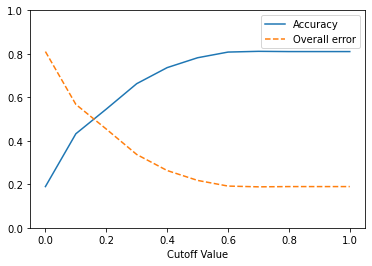

In [30]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
cutoffs = [i * 0.1 for i in range(0, 11)]
accT = []
for cutoff in cutoffs:
    predicted = [1 if p > cutoff else 0 for p in df.prob]
    accT.append(accuracy_score(df.actual, predicted))
line_accuracy = plt.plot(cutoffs, accT, '-', label='Accuracy')[0]
line_error = plt.plot(cutoffs, [1-acc for acc in accT], '--', label='Overall error')[0]
plt.ylim([0,1])
plt.xlabel('Cutoff Value')
plt.legend(handles=[line_accuracy, line_error])
plt.show()

In [31]:
# generating ROC curve and computing AUC

fpr, tpr, thresholds = roc_curve(df.actual, df.prob, pos_label=1)
roc_auc = auc(fpr, tpr)
roc_auc 

0.6353721129170231

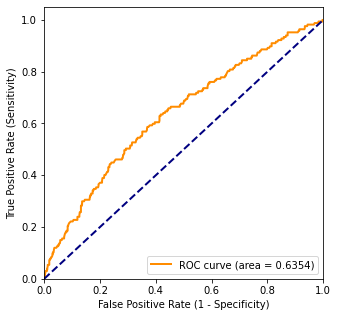

In [32]:
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")